In [432]:
import pandas as pd
# reading in the csv
global_temperature_statistics = pd.read_csv("datasets/Global/GlobalLandTemperaturesByCountry.csv").copy()
global_economy_statistics = pd.read_csv("datasets/Global/Global Economy Indicators.csv").copy()

In [433]:
global_temperature_statistics['AverageTemperature'] = global_temperature_statistics["AverageTemperature"].fillna(0)
global_economy_statistics = global_economy_statistics[global_economy_statistics["Year"].astype(float) < 2013]
global_economy_statistics['Country'] = global_economy_statistics['Country'].apply(lambda x: x.strip())

In [434]:
# was trying to figure out for a while why 2013 wasn't included in the refined dataset and its because the dataset hadn't recorded 12 months of 2013 (dataset ends at September 2013) so I'm going to do up to the end of 2012
average_year_temperature = 0
year_column = []
temperature_column = []
country_column = []
for index, row in global_temperature_statistics.iterrows():
    date = row['dt']
    month = int(date[5:7])
    year = int(date[:4])
    country = row["Country"]
    average_monthly_temperature = float(row['AverageTemperature'])
    if year < 1970 or year > 2012:
        continue
    average_year_temperature += average_monthly_temperature
    if month == 12:
        year_column.append(year)
        temperature_column.append(average_year_temperature / 12)
        country_column.append(row["Country"])
        average_year_temperature = 0

In [435]:
refined_global_temperature_data = {"Year" : year_column, "Yearly Average Temperature" : temperature_column, "Country" : country_column}
refined_global_temperature_statistics = pd.DataFrame(refined_global_temperature_data)
refined_global_temperature_statistics

,Year,Yearly Average Temperature,Country
0,1970,4.442833,Åland
1,1971,5.623750,Åland
2,1972,6.358333,Åland
3,1973,6.198083,Åland
4,1974,6.766917,Åland
...,...,...,...
10444,2008,21.545583,Zimbabwe
10445,2009,21.377250,Zimbabwe
10446,2010,21.986250,Zimbabwe
10447,2011,21.602417,Zimbabwe


In [436]:
countries_we_need = set(global_economy_statistics["Country"].tolist())
refined_global_temperature_statistics = refined_global_temperature_statistics[refined_global_temperature_statistics['Country'].isin(countries_we_need)]
refined_global_temperature_statistics.reset_index()

,index,Year,Yearly Average Temperature,Country
0,43,1970,14.783083,Afghanistan
1,44,1971,14.823500,Afghanistan
2,45,1972,12.547167,Afghanistan
3,46,1973,14.235500,Afghanistan
4,47,1974,13.316750,Afghanistan
...,...,...,...,...
7219,10444,2008,21.545583,Zimbabwe
7220,10445,2009,21.377250,Zimbabwe
7221,10446,2010,21.986250,Zimbabwe
7222,10447,2011,21.602417,Zimbabwe


In [437]:
global_economy_statistics = global_economy_statistics[global_economy_statistics['Country'].isin(countries_we_need)]
global_economy_statistics.reset_index()

,index,CountryID,Country,Year,AMA exchange rate,Population,Per capita GNI,Exports of goods and services,Final consumption expenditure,Imports of goods and services,Total Value Added,Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,0,4,Afghanistan,1970,0.044998,10752971,164,1.656187e+08,1.663221e+09,1.952772e+08,1.731454e+09,1.766528e+09,1.731436e+09
1,1,4,Afghanistan,1971,0.044998,11015857,168,1.935803e+08,1.796541e+09,2.762965e+08,1.812857e+09,1.850122e+09,1.812838e+09
2,2,4,Afghanistan,1972,0.044998,11286753,149,2.276544e+08,1.607159e+09,2.903704e+08,1.647918e+09,1.683948e+09,1.647900e+09
3,3,4,Afghanistan,1973,0.044998,11575305,150,2.269136e+08,1.617037e+09,2.629629e+08,1.702735e+09,1.739998e+09,1.702716e+09
4,4,4,Afghanistan,1974,0.044998,11869879,177,2.849384e+08,1.907408e+09,3.056792e+08,2.061752e+09,2.106420e+09,2.061729e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8599,10498,894,Zambia,2008,3.745661,12852966,1285,5.814915e+09,1.169239e+10,5.552238e+09,1.688576e+10,1.651244e+10,1.791105e+10
8600,10499,894,Zambia,2009,5.046109,13318087,1119,4.908039e+09,9.933275e+09,4.318337e+09,1.471750e+10,1.490960e+10,1.532830e+10
8601,10500,894,Zambia,2010,4.797137,13792086,1368,7.503455e+09,1.296408e+10,6.256941e+09,1.914401e+10,1.887353e+10,2.026540e+10
8602,10501,894,Zambia,2011,4.860666,14265814,1561,9.494420e+09,1.548554e+10,8.385313e+09,2.216481e+10,2.227390e+10,2.448759e+10


In [438]:
economy_and_temperature_statistics = pd.merge(global_economy_statistics, refined_global_temperature_statistics, on=['Year', 'Country'])
economy_and_temperature_statistics

,CountryID,Country,Year,AMA exchange rate,Population,Per capita GNI,Exports of goods and services,Final consumption expenditure,Imports of goods and services,Total Value Added,Gross National Income(GNI) in USD,Gross Domestic Product (GDP),Yearly Average Temperature
0,4,Afghanistan,1970,0.044998,10752971,164,1.656187e+08,1.663221e+09,1.952772e+08,1.731454e+09,1.766528e+09,1.731436e+09,14.783083
1,4,Afghanistan,1971,0.044998,11015857,168,1.935803e+08,1.796541e+09,2.762965e+08,1.812857e+09,1.850122e+09,1.812838e+09,14.823500
2,4,Afghanistan,1972,0.044998,11286753,149,2.276544e+08,1.607159e+09,2.903704e+08,1.647918e+09,1.683948e+09,1.647900e+09,12.547167
3,4,Afghanistan,1973,0.044998,11575305,150,2.269136e+08,1.617037e+09,2.629629e+08,1.702735e+09,1.739998e+09,1.702716e+09,14.235500
4,4,Afghanistan,1974,0.044998,11869879,177,2.849384e+08,1.907408e+09,3.056792e+08,2.061752e+09,2.106420e+09,2.061729e+09,13.316750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6727,894,Zambia,2008,3.745661,12852966,1285,5.814915e+09,1.169239e+10,5.552238e+09,1.688576e+10,1.651244e+10,1.791105e+10,21.535833
6728,894,Zambia,2009,5.046109,13318087,1119,4.908039e+09,9.933275e+09,4.318337e+09,1.471750e+10,1.490960e+10,1.532830e+10,21.670250
6729,894,Zambia,2010,4.797137,13792086,1368,7.503455e+09,1.296408e+10,6.256941e+09,1.914401e+10,1.887353e+10,2.026540e+10,22.267500
6730,894,Zambia,2011,4.860666,14265814,1561,9.494420e+09,1.548554e+10,8.385313e+09,2.216481e+10,2.227390e+10,2.448759e+10,21.771583


In [439]:
import plotly.express as px

fig_gdp_growth = px.line(
    economy_and_temperature_statistics,
    x='Year',
    y='Gross Domestic Product (GDP)',
    color='Country',
    title='GDP Growth Over Time',
)
fig_gdp_growth.show()

In [440]:
fig_gdp_growth = px.line(
    economy_and_temperature_statistics,
    x='Year',
    y='Yearly Average Temperature',
    color='Country',
    title='Yearly Average Temperature Over Time',
)
fig_gdp_growth.show()

In [441]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = pd.merge(world, economy_and_temperature_statistics[['Country', 'Yearly Average Temperature']], 
                 how='left', left_on='name', right_on='Country')
fig = px.choropleth(world,
                    locations='iso_a3',
                    color='Yearly Average Temperature',
                    hover_name='name',
                    color_continuous_scale='OrRd',
                    title='Temperature by Country')

fig.show()

/var/folders/cq/3lsysm914vv82q5vcg2kqyd40000gq/T/ipykernel_96772/247656591.py:2: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



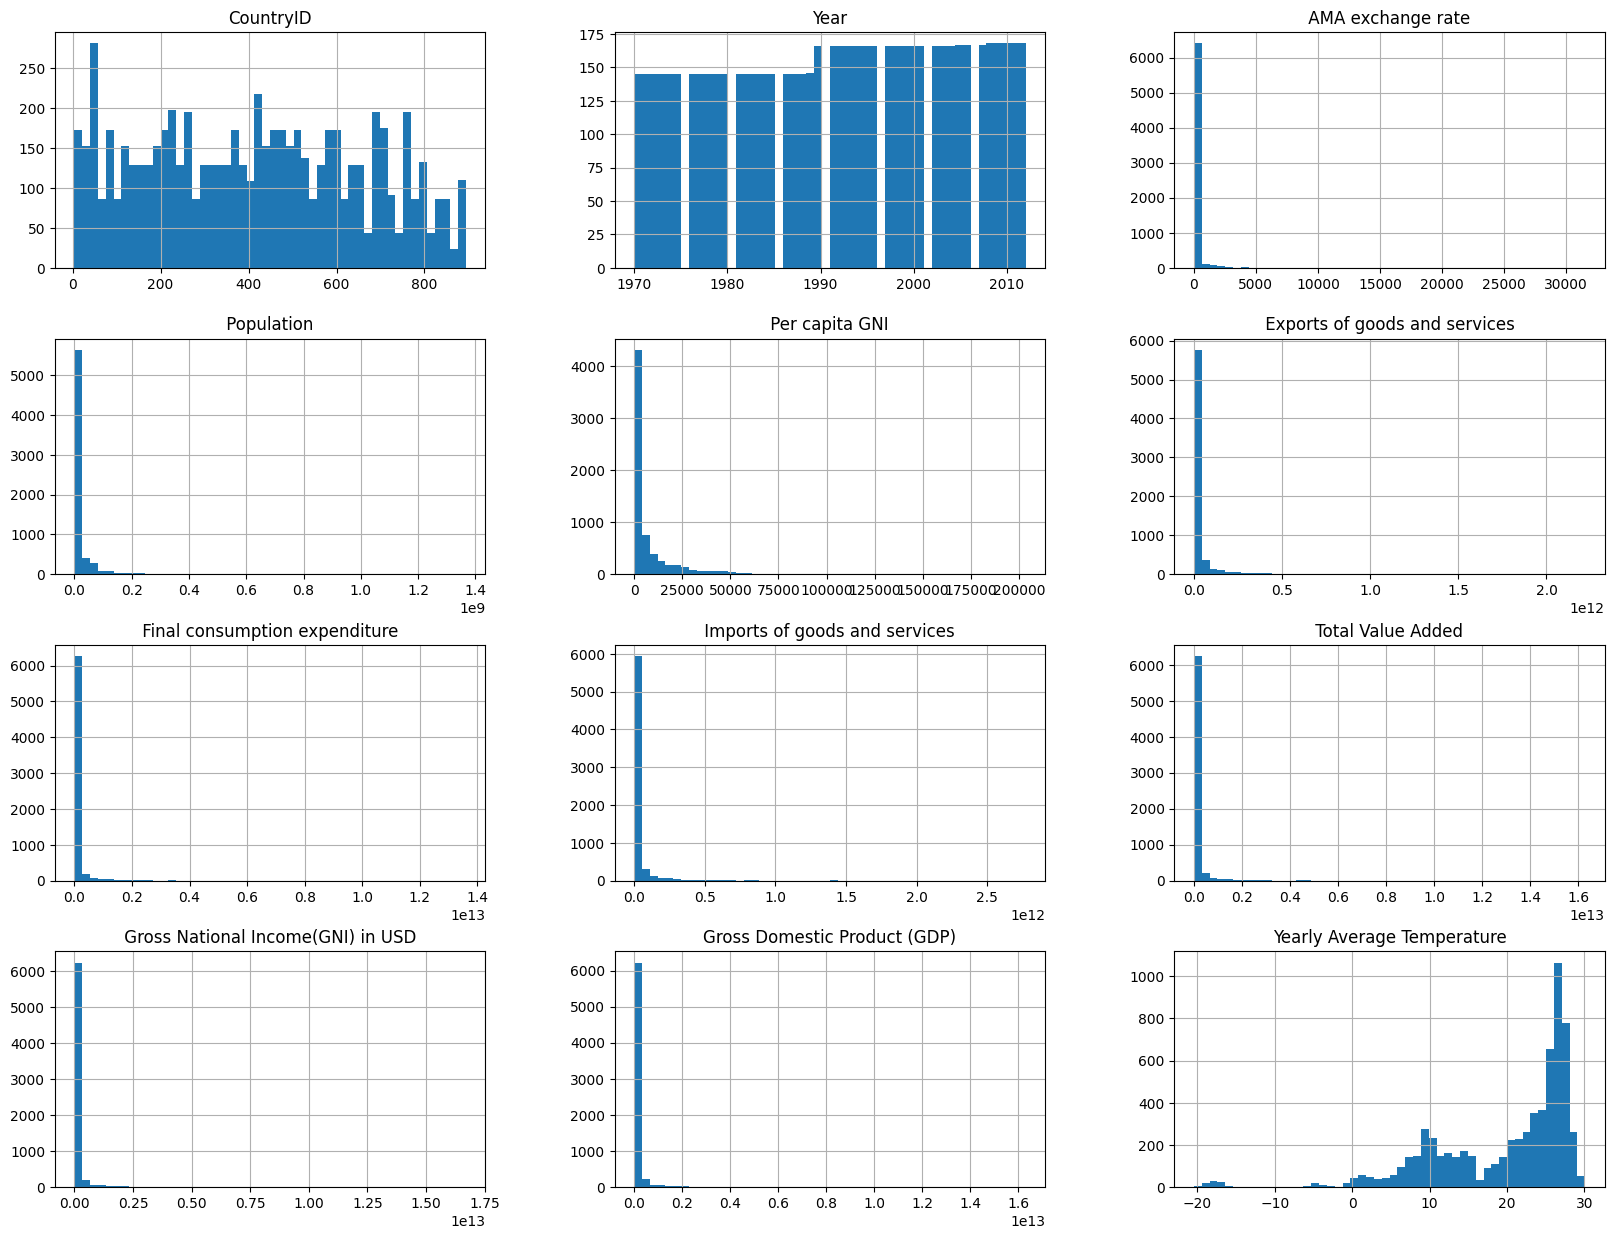

In [442]:
# !!! start of global diagrams and correlation !!!
%matplotlib inline
import matplotlib.pyplot as plt
economy_and_temperature_statistics.hist(bins=50, figsize=(20,15))
plt.show()

In [443]:
economy_and_temperature_plaything = economy_and_temperature_statistics.copy().drop("Country", axis=1)
corr_matrix = economy_and_temperature_plaything.corr(method="kendall")
corr_matrix["Yearly Average Temperature"].sort_values(ascending=False)

Yearly Average Temperature             1.000000
 AMA exchange rate                     0.180391
CountryID                              0.026983
Year                                   0.009153
 Population                           -0.155506
 Per capita GNI                       -0.204111
 Total Value Added                    -0.273486
Gross Domestic Product (GDP)          -0.277274
 Gross National Income(GNI) in USD    -0.279875
 Final consumption expenditure        -0.280594
 Exports of goods and services        -0.281121
 Imports of goods and services        -0.286878
Name: Yearly Average Temperature, dtype: float64

array([[<Axes: xlabel='Yearly Average Temperature', ylabel='Yearly Average Temperature'>,
        <Axes: xlabel='Gross Domestic Product (GDP)', ylabel='Yearly Average Temperature'>,
        <Axes: xlabel='Year', ylabel='Yearly Average Temperature'>],
       [<Axes: xlabel='Yearly Average Temperature', ylabel='Gross Domestic Product (GDP)'>,
        <Axes: xlabel='Gross Domestic Product (GDP)', ylabel='Gross Domestic Product (GDP)'>,
        <Axes: xlabel='Year', ylabel='Gross Domestic Product (GDP)'>],
       [<Axes: xlabel='Yearly Average Temperature', ylabel='Year'>,
        <Axes: xlabel='Gross Domestic Product (GDP)', ylabel='Year'>,
        <Axes: xlabel='Year', ylabel='Year'>]], dtype=object)

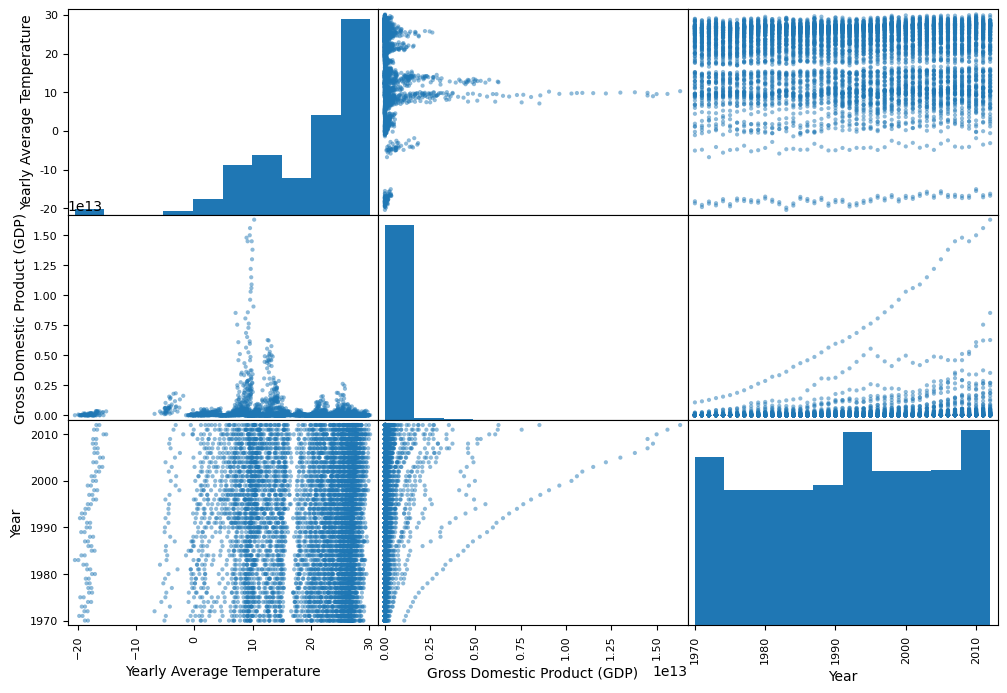

In [444]:
from pandas.plotting import scatter_matrix
attributes = ["Yearly Average Temperature", "Gross Domestic Product (GDP)", "Year"]
scatter_matrix(economy_and_temperature_statistics[attributes], figsize=(12, 8))

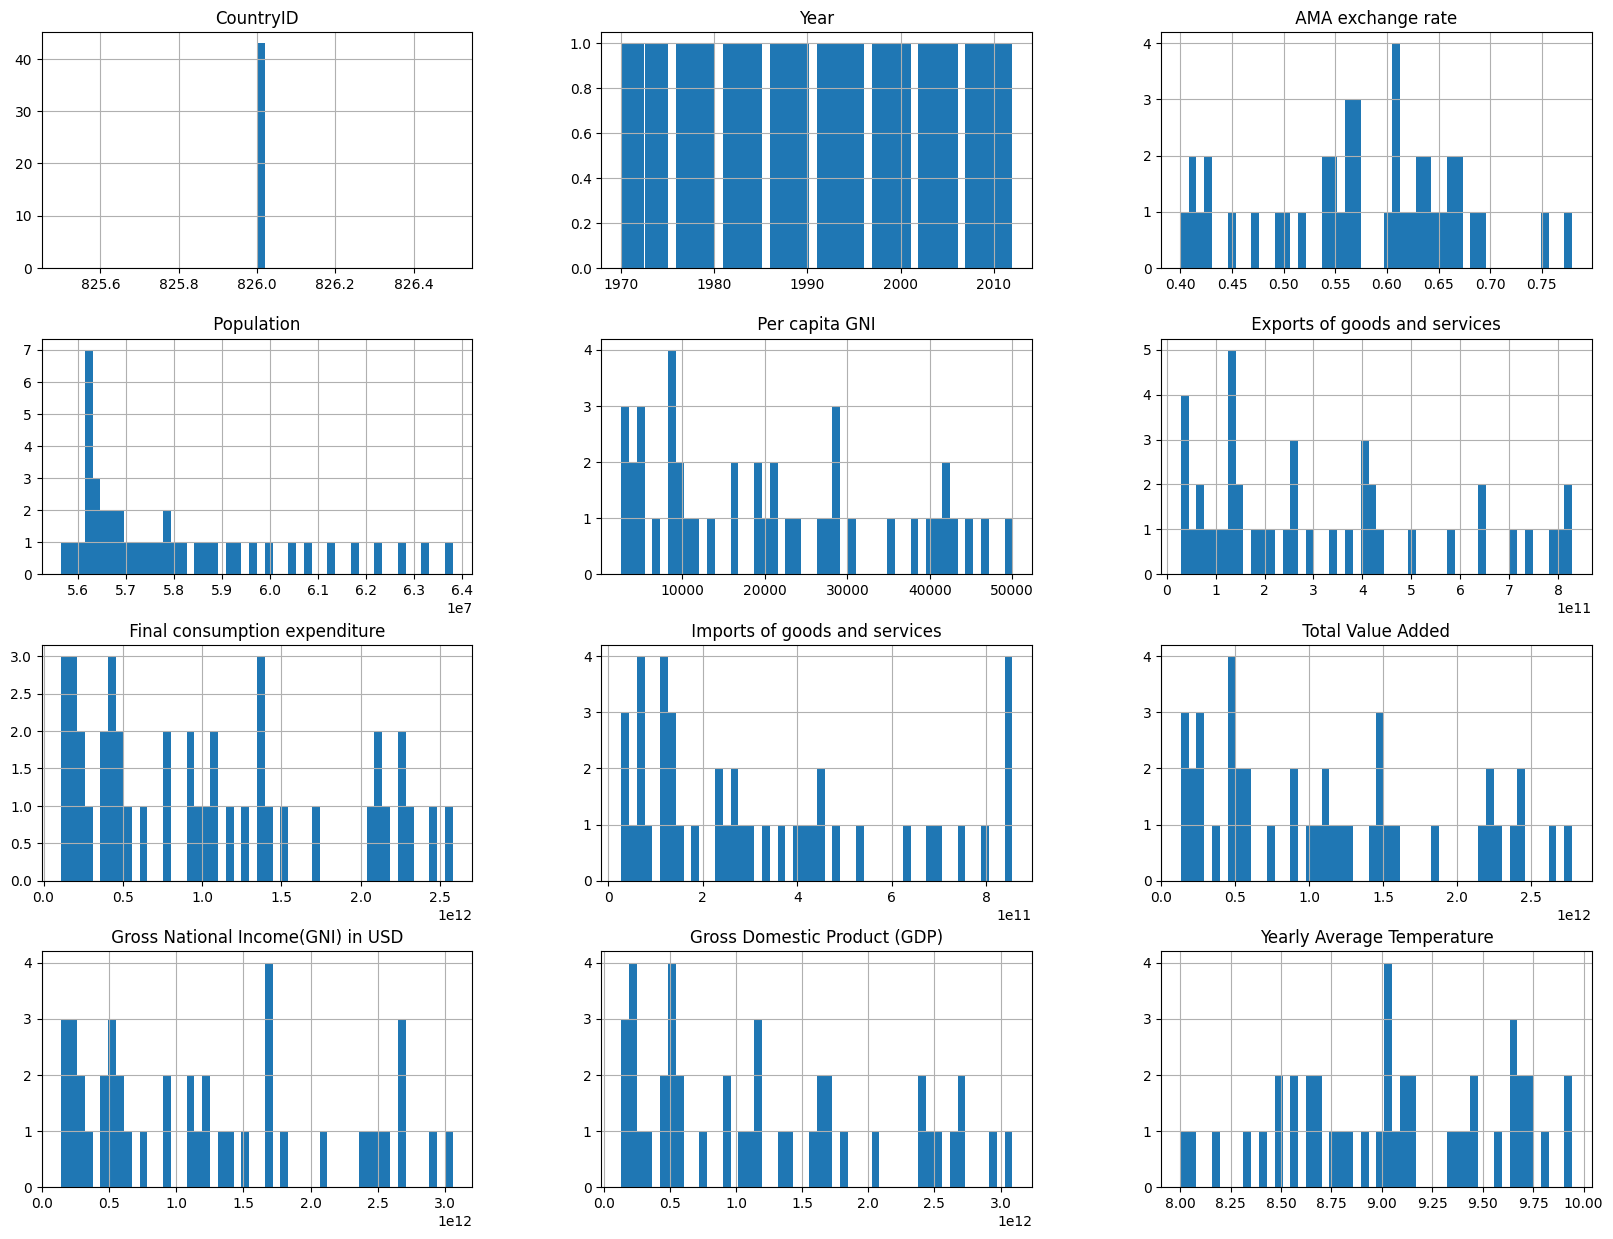

In [445]:
# !!! end of global diagrams and start of diagrams with one country !!!
economy_and_temperature_plaything_united_kingdom_only = economy_and_temperature_statistics.copy()[economy_and_temperature_statistics["Country"] == "United Kingdom"].drop("Country", axis=1)
economy_and_temperature_plaything_united_kingdom_only.hist(bins=50, figsize=(20, 15))
plt.show() 

array([[<Axes: xlabel='Yearly Average Temperature', ylabel='Yearly Average Temperature'>,
        <Axes: xlabel='Gross Domestic Product (GDP)', ylabel='Yearly Average Temperature'>,
        <Axes: xlabel='Year', ylabel='Yearly Average Temperature'>],
       [<Axes: xlabel='Yearly Average Temperature', ylabel='Gross Domestic Product (GDP)'>,
        <Axes: xlabel='Gross Domestic Product (GDP)', ylabel='Gross Domestic Product (GDP)'>,
        <Axes: xlabel='Year', ylabel='Gross Domestic Product (GDP)'>],
       [<Axes: xlabel='Yearly Average Temperature', ylabel='Year'>,
        <Axes: xlabel='Gross Domestic Product (GDP)', ylabel='Year'>,
        <Axes: xlabel='Year', ylabel='Year'>]], dtype=object)

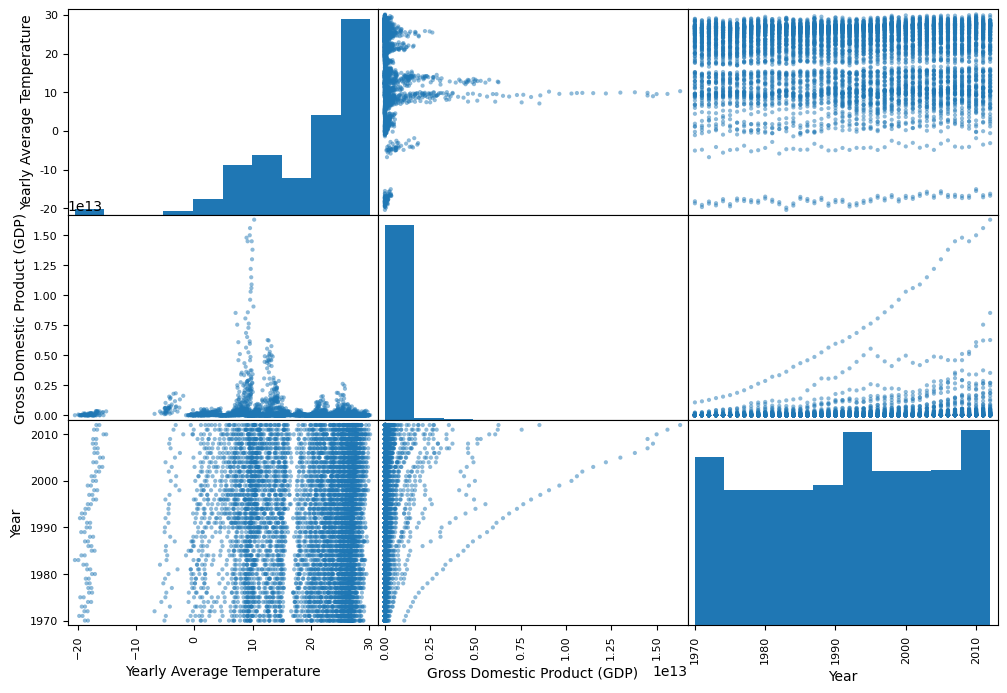

In [446]:
scatter_matrix(economy_and_temperature_plaything[attributes], figsize=(12, 8))

In [447]:
corr_matrix = economy_and_temperature_plaything_united_kingdom_only.corr()
corr_matrix["Yearly Average Temperature"].sort_values(ascending=False)

# you will need to use the below for the data set with one country
#from sklearn.model_selection import StratifiedShuffleSplit
# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) for train_index, test_index in split.split(housing, housing["income_cat"]):
#         strat_train_set = housing.loc[train_index]
#         strat_test_set = housing.loc[test_index]

Yearly Average Temperature             1.000000
 Per capita GNI                        0.645655
 Gross National Income(GNI) in USD     0.635909
Gross Domestic Product (GDP)           0.635351
 Total Value Added                     0.631263
 Final consumption expenditure         0.628332
 Imports of goods and services         0.605554
 Exports of goods and services         0.594334
Year                                   0.584927
 Population                            0.519996
 AMA exchange rate                     0.088568
CountryID                                   NaN
Name: Yearly Average Temperature, dtype: float64

In [448]:
# Train the big dataset
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(economy_and_temperature_plaything, test_size=0.2, random_state=42)

In [449]:
from sklearn.model_selection import ShuffleSplit
split = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(economy_and_temperature_plaything, economy_and_temperature_plaything["Yearly Average Temperature"]):
    strat_train_set = economy_and_temperature_plaything.loc[train_index]
    strat_test_set = economy_and_temperature_plaything.loc[test_index]

strat_test_set["Yearly Average Temperature"].value_counts() / len(strat_test_set)
for set_ in (strat_train_set, strat_test_set): 
    set_.drop("Yearly Average Temperature", axis=1, inplace=True)
economy_and_temperature_plaything = strat_train_set.drop("Gross Domestic Product (GDP)", axis=1)
economy_and_temperature_plaything_labels = strat_train_set["Gross Domestic Product (GDP)"].copy()

In [450]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

economy_and_temperature_plaything_test = economy_and_temperature_plaything.copy()
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])
economy_and_temperature_plaything_transformed = num_pipeline.fit_transform(economy_and_temperature_plaything_test)

In [451]:
from sklearn.compose import ColumnTransformer 
num_attribs = list(economy_and_temperature_plaything)
full_pipeline = ColumnTransformer([
     ("num", num_pipeline, num_attribs)
 ])
economy_and_temperature_plaything_prepared = full_pipeline.fit_transform(economy_and_temperature_plaything)

In [452]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(economy_and_temperature_plaything_prepared, economy_and_temperature_plaything_labels)

LinearRegression()

In [453]:
some_data = economy_and_temperature_plaything.iloc[:5]
some_labels = economy_and_temperature_plaything_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [1.77502757e+10 2.69336584e+09 1.21301403e+09 4.93717642e+09
 8.80691773e+10]


In [454]:
print("Labels:", list(some_labels))

Labels: [16190785267.0, 1470240370.0, 658369594.0, 5410606535.0, 88823900235.0]


In [455]:
from sklearn.metrics import mean_squared_error
import numpy as np
GDP_predictions = lin_reg.predict(economy_and_temperature_plaything_prepared)
lin_mse = mean_squared_error(economy_and_temperature_plaything_labels, GDP_predictions) 
lin_rmse = np.sqrt(lin_mse)
lin_rmse

9261435193.348595

In [456]:
from sklearn.tree import DecisionTreeRegressor 
tree_reg = DecisionTreeRegressor()
tree_reg.fit(economy_and_temperature_plaything_prepared, economy_and_temperature_plaything_labels)

DecisionTreeRegressor()

In [457]:
GDP_predictions = tree_reg.predict(economy_and_temperature_plaything_prepared)
tree_mse = mean_squared_error(economy_and_temperature_plaything_labels, GDP_predictions) 
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [458]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, economy_and_temperature_plaything_prepared, economy_and_temperature_plaything_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [459]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [1.44295702e+10 4.03437345e+10 7.69155043e+10 1.92591105e+10
 4.03619063e+10 5.74554470e+10 4.41634444e+10 7.55432687e+10
 4.56941908e+10 2.96334746e+10]
Mean: 44379965141.04337
Standard deviation: 19951023841.145844


In [460]:
lin_scores = cross_val_score(lin_reg, economy_and_temperature_plaything_prepared, economy_and_temperature_plaything_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [7.26100470e+09 7.73466674e+09 1.10789366e+10 7.76411925e+09
 1.13826008e+10 1.16090486e+10 1.28297981e+10 8.13134594e+09
 7.65016562e+09 1.08287843e+10]
Mean: 9627047054.513622
Standard deviation: 1990351988.9385355


In [461]:
from sklearn.ensemble import RandomForestRegressor 
forest_reg = RandomForestRegressor()
forest_reg.fit(economy_and_temperature_plaything_prepared, economy_and_temperature_plaything_labels)

RandomForestRegressor()

In [462]:
GDP_predictions = forest_reg.predict(economy_and_temperature_plaything_prepared)
forest_mse = mean_squared_error(economy_and_temperature_plaything_labels, GDP_predictions) 
forest_rmse = np.sqrt(tree_mse)
forest_rmse

0.0

In [463]:
scores = cross_val_score(forest_reg, economy_and_temperature_plaything_prepared, economy_and_temperature_plaything_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [6.32282143e+09 1.94227427e+10 1.79569377e+10 1.48292714e+10
 2.49696930e+10 3.13251701e+10 4.11991420e+10 2.10306977e+10
 1.41057202e+10 1.73702883e+10]
Mean: 20853248462.738564
Standard deviation: 9252620441.762758
